In [ ]:
pip install obsei dateparser


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 290 kB 55.9 MB/s 
     |████████████████████████████████| 188 kB 62.2 MB/s 
     |████████████████████████████████| 2.3 MB 55.1 MB/s 
     |████████████████████████████████| 50 kB 9.4 MB/s 
     |████████████████████████████████| 96 kB 8.0 MB/s 
     |████████████████████████████████| 306 kB 81.1 MB/s 
     |████████████████████████████████| 160 kB 69.2 MB/s 
     |████████████████████████████████| 11.1 MB 52.1 MB/s 
     |████████████████████████████████| 288 kB 48.0 MB/s 
     |████████████████████████████████| 114 kB 47.2 MB/s 
     |████████████████████████████████| 151 kB 48.0 MB/s 
     |████████████████████████████████| 457 kB 49.0 MB/s 
     |████████████████████████████████| 62 kB 551 kB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
     |████████████████████████████████| 

In [ ]:
pip install protobuf==3.20.*

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 26.7 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.2
    Uninstalling protobuf-4.21.2:
      Successfully uninstalled protobuf-4.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
obsei 0.0.12 requires protobuf==4.21.2, but you have protobuf 3.20.3 which is incompatible.
firebase-admin 4.4.0 requires google-api-core[grpc]<2.0.0dev,>=1.14.0; platform_python_implementation != "PyPy", but you have google-api-core 2.8.2 which is incompatible.


In [ ]:

from obsei.analyzer.classification_analyzer import (
    ClassificationAnalyzerConfig, ZeroShotClassificationAnalyzer)
from obsei.source.youtube_scrapper import (YoutubeScrapperConfig,
                                           YoutubeScrapperSource)

In [181]:
video_url = 'https://youtu.be/0e3GPea1Tyg'

In [182]:
source_config = YoutubeScrapperConfig(
    video_url= video_url,
    fetch_replies=False,
    max_comments=100,
    lookup_period="6Y",
)


In [183]:
source = YoutubeScrapperSource()

source_response_list = source.lookup(source_config)

In [184]:

for idx, source_response in enumerate(source_response_list):
    print(f"source_response#'{idx}'='{source_response.__dict__}'")


source_response#'0'='{'segmented_data': {}, 'meta': {'comment_id': 'UgzH8vliQSJKHQMGZjx4AaABAg', 'text': 'Like I said in the video, subscribe if you haven’t already and you could win $10,000!', 'time': datetime.datetime(2021, 11, 30, 12, 22, 32, 639605, tzinfo=datetime.timezone.utc), 'author': 'MrBeast', 'channel': 'UCX6OQ3DkcsbYNE6H8uQQuVA', 'votes': '897K', 'photo': 'https://yt3.ggpht.com/ytc/AMLnZu9NaXMe8tiBBVF3N608TFvJSihHF2Ez8yPIqkTl1g=s176-c-k-c0x00ffffff-no-rj', 'heart': False}, 'source_name': 'YoutubeScrapper', 'processed_text': 'Like I said in the video, subscribe if you haven’t already and you could win $10,000!'}'
source_response#'1'='{'segmented_data': {}, 'meta': {'comment_id': 'Ugwf5J_a7bFswtlCRk54AaABAg', 'text': 'The fact this entire thing was created in about 40 days blows my mind.', 'time': datetime.datetime(2021, 11, 30, 12, 22, 32, 642028, tzinfo=datetime.timezone.utc), 'author': 'BrentTV', 'channel': 'UC2C6_mSbiLp3CplZcgLTHXg', 'votes': '197K', 'photo': 'https://yt

In [185]:

text_analyzer = ZeroShotClassificationAnalyzer(
    model_name_or_path="typeform/mobilebert-uncased-mnli", device="auto"
)


In [186]:

analyzer_response_list = text_analyzer.analyze_input(
    source_response_list=source_response_list,
    analyzer_config=ClassificationAnalyzerConfig(
        labels=["positive", "negative"],
    ),
)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [188]:
for idx, an_response in enumerate(analyzer_response_list):
    print(f"analyzer_response#'{idx}'='{an_response.__dict__}'")

analyzer_response#'0'='{'segmented_data': {'classifier_data': {'positive': 0.51264488697052, 'negative': 0.12865577638149261}}, 'meta': {'comment_id': 'UgzH8vliQSJKHQMGZjx4AaABAg', 'text': 'Like I said in the video, subscribe if you haven’t already and you could win $10,000!', 'time': datetime.datetime(2021, 11, 30, 12, 22, 32, 639605, tzinfo=datetime.timezone.utc), 'author': 'MrBeast', 'channel': 'UCX6OQ3DkcsbYNE6H8uQQuVA', 'votes': '897K', 'photo': 'https://yt3.ggpht.com/ytc/AMLnZu9NaXMe8tiBBVF3N608TFvJSihHF2Ez8yPIqkTl1g=s176-c-k-c0x00ffffff-no-rj', 'heart': False}, 'source_name': 'YoutubeScrapper', 'processed_text': 'Like I said in the video, subscribe if you haven’t already and you could win $10,000!'}'
analyzer_response#'1'='{'segmented_data': {'classifier_data': {'negative': 0.9319732189178467, 'positive': 0.001379563589580357}}, 'meta': {'comment_id': 'Ugwf5J_a7bFswtlCRk54AaABAg', 'text': 'The fact this entire thing was created in about 40 days blows my mind.', 'time': datetime.

In [189]:
from pandas import DataFrame
from obsei.sink.pandas_sink import PandasSink, PandasSinkConfig

sink_config = PandasSinkConfig(
   dataframe=DataFrame()
)
sink = PandasSink()

In [190]:
dataframe = sink.send_data(analyzer_response_list, sink_config)

In [191]:
dataframe

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,"Like I said in the video, subscribe if you hav...",0.51,0.13,UgzH8vliQSJKHQMGZjx4AaABAg,"Like I said in the video, subscribe if you hav...",2021-11-30 12:22:32.639605+00:00,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,897K,https://yt3.ggpht.com/ytc/AMLnZu9NaXMe8tiBBVF3...,False,YoutubeScrapper
1,The fact this entire thing was created in abou...,0.00,0.93,Ugwf5J_a7bFswtlCRk54AaABAg,The fact this entire thing was created in abou...,2021-11-30 12:22:32.642028+00:00,BrentTV,UC2C6_mSbiLp3CplZcgLTHXg,197K,https://yt3.ggpht.com/tyUQLdkEG7taT2VE_yMi8R6c...,False,YoutubeScrapper
2,"This is insanity, never done before in the his...",0.00,1.00,UgyGfDDltCtr_JO3x894AaABAg,"This is insanity, never done before in the his...",2021-11-30 12:22:32.644019+00:00,Yes Theory,UCvK4bOhULCpmLabd2pDMtnA,385K,https://yt3.ggpht.com/vVNRN2owIpF1EKhfENoMhDRw...,False,YoutubeScrapper
3,This was done so well....I hope it gets a seas...,1.00,0.00,UgwLpWohZir_pTw9fMh4AaABAg,This was done so well....I hope it gets a seas...,2022-06-30 12:22:32.645958+00:00,STREETBEEFS SCRAPYARD,UC2Tr7vqNAg32eozqAuElfZQ,6.7K,https://yt3.ggpht.com/WZV5Kde4W1z-4_cDra68wDro...,False,YoutubeScrapper
4,Props to the people who set up this entire set...,0.99,0.00,Ugwsp6vfueHwio7gQwR4AaABAg,Props to the people who set up this entire set...,2022-07-30 12:22:32.647929+00:00,Extreme Emerald Gacha,UCkONPMgaYMf1J2ytP_ZKQdw,1.5K,https://yt3.ggpht.com/kDfU8bHTmNY51MKco9jvgMA6...,False,YoutubeScrapper
5,"Huge props to the set designers, everything wa...",0.98,0.00,Ugwv-VS6YdF4YpMGVnZ4AaABAg,"Huge props to the set designers, everything wa...",2022-10-26 12:22:32.649360+00:00,akbar a Roblox game,UCr85rd-Zp4AdU7J9s-KPmUQ,104,https://yt3.ggpht.com/ZxfHvgHl2ioydLglHbOD1wxm...,False,YoutubeScrapper
6,Even months later this still remains to be inc...,0.98,0.00,Ugw28ZCz3u78fYZ0wfZ4AaABAg,Even months later this still remains to be inc...,2022-08-30 12:22:32.651246+00:00,MichouOff,UCzq7hPWebQSRbh7_mb6weSg,605,https://yt3.ggpht.com/NepOVnUo0kdgHk7GrEk5dO0K...,False,YoutubeScrapper
7,He's got more budget than the original producers.,0.92,0.07,UgwR0wsahEn2z1NTH-N4AaABAg,He's got more budget than the original producers.,2022-10-20 12:22:32.652704+00:00,Shalev Ottolenghi,UC5g4OYqJlKYtcCMx_UYFnUg,326,https://yt3.ggpht.com/ytc/AMLnZu-HIQu7p5RF8VrK...,False,YoutubeScrapper
8,"Incredible job putting this together, Jimmy! S...",0.99,0.00,Ugzj8RnNl0tN8HAiD5l4AaABAg,"Incredible job putting this together, Jimmy! S...",2022-08-30 12:22:32.654591+00:00,봉태희TV,UCh9hB6VSXVwm2zrY4DrlE7g,918,https://yt3.ggpht.com/ytc/AMLnZu-0OC29HgIFNw-P...,False,YoutubeScrapper
9,"Frankly, the sound, the montage, the fun and t...",0.05,0.65,UgzbsWcOXRMOtPqvRKB4AaABAg,"Frankly, the sound, the montage, the fun and t...",2022-09-30 12:22:32.656479+00:00,AL FISO 🅥,UC6PDzm0jPaJkVIFh2dK8VvA,679,https://yt3.ggpht.com/EJWdLoeBEvSPy-1pQMEcHhxV...,False,YoutubeScrapper


In [192]:
import re
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
dataframe['Cleaned Reviews'] = dataframe['processed_text'].apply(clean)
dataframe.head()

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name,Cleaned Reviews
0,"Like I said in the video, subscribe if you hav...",0.51,0.13,UgzH8vliQSJKHQMGZjx4AaABAg,"Like I said in the video, subscribe if you hav...",2021-11-30 12:22:32.639605+00:00,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,897K,https://yt3.ggpht.com/ytc/AMLnZu9NaXMe8tiBBVF3...,False,YoutubeScrapper,Like I said in the video subscribe if you have...
1,The fact this entire thing was created in abou...,0.00,0.93,Ugwf5J_a7bFswtlCRk54AaABAg,The fact this entire thing was created in abou...,2021-11-30 12:22:32.642028+00:00,BrentTV,UC2C6_mSbiLp3CplZcgLTHXg,197K,https://yt3.ggpht.com/tyUQLdkEG7taT2VE_yMi8R6c...,False,YoutubeScrapper,The fact this entire thing was created in abou...
2,"This is insanity, never done before in the his...",0.00,1.00,UgyGfDDltCtr_JO3x894AaABAg,"This is insanity, never done before in the his...",2021-11-30 12:22:32.644019+00:00,Yes Theory,UCvK4bOhULCpmLabd2pDMtnA,385K,https://yt3.ggpht.com/vVNRN2owIpF1EKhfENoMhDRw...,False,YoutubeScrapper,This is insanity never done before in the hist...
3,This was done so well....I hope it gets a seas...,1.00,0.00,UgwLpWohZir_pTw9fMh4AaABAg,This was done so well....I hope it gets a seas...,2022-06-30 12:22:32.645958+00:00,STREETBEEFS SCRAPYARD,UC2Tr7vqNAg32eozqAuElfZQ,6.7K,https://yt3.ggpht.com/WZV5Kde4W1z-4_cDra68wDro...,False,YoutubeScrapper,This was done so well I hope it gets a season
4,Props to the people who set up this entire set...,0.99,0.00,Ugwsp6vfueHwio7gQwR4AaABAg,Props to the people who set up this entire set...,2022-07-30 12:22:32.647929+00:00,Extreme Emerald Gacha,UCkONPMgaYMf1J2ytP_ZKQdw,1.5K,https://yt3.ggpht.com/kDfU8bHTmNY51MKco9jvgMA6...,False,YoutubeScrapper,Props to the people who set up this entire set...


In [193]:
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [194]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [195]:
dataframe['POS tagged'] = dataframe['Cleaned Reviews'].apply(token_stop_pos)
dataframe.head()

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name,Cleaned Reviews,POS tagged
0,"Like I said in the video, subscribe if you hav...",0.51,0.13,UgzH8vliQSJKHQMGZjx4AaABAg,"Like I said in the video, subscribe if you hav...",2021-11-30 12:22:32.639605+00:00,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,897K,https://yt3.ggpht.com/ytc/AMLnZu9NaXMe8tiBBVF3...,False,YoutubeScrapper,Like I said in the video subscribe if you have...,"[(Like, None), (said, v), (video, n), (subscri..."
1,The fact this entire thing was created in abou...,0.00,0.93,Ugwf5J_a7bFswtlCRk54AaABAg,The fact this entire thing was created in abou...,2021-11-30 12:22:32.642028+00:00,BrentTV,UC2C6_mSbiLp3CplZcgLTHXg,197K,https://yt3.ggpht.com/tyUQLdkEG7taT2VE_yMi8R6c...,False,YoutubeScrapper,The fact this entire thing was created in abou...,"[(fact, n), (entire, a), (thing, n), (created,..."
2,"This is insanity, never done before in the his...",0.00,1.00,UgyGfDDltCtr_JO3x894AaABAg,"This is insanity, never done before in the his...",2021-11-30 12:22:32.644019+00:00,Yes Theory,UCvK4bOhULCpmLabd2pDMtnA,385K,https://yt3.ggpht.com/vVNRN2owIpF1EKhfENoMhDRw...,False,YoutubeScrapper,This is insanity never done before in the hist...,"[(insanity, a), (never, r), (done, v), (histor..."
3,This was done so well....I hope it gets a seas...,1.00,0.00,UgwLpWohZir_pTw9fMh4AaABAg,This was done so well....I hope it gets a seas...,2022-06-30 12:22:32.645958+00:00,STREETBEEFS SCRAPYARD,UC2Tr7vqNAg32eozqAuElfZQ,6.7K,https://yt3.ggpht.com/WZV5Kde4W1z-4_cDra68wDro...,False,YoutubeScrapper,This was done so well I hope it gets a season,"[(done, v), (well, r), (hope, v), (gets, v), (..."
4,Props to the people who set up this entire set...,0.99,0.00,Ugwsp6vfueHwio7gQwR4AaABAg,Props to the people who set up this entire set...,2022-07-30 12:22:32.647929+00:00,Extreme Emerald Gacha,UCkONPMgaYMf1J2ytP_ZKQdw,1.5K,https://yt3.ggpht.com/kDfU8bHTmNY51MKco9jvgMA6...,False,YoutubeScrapper,Props to the people who set up this entire set...,"[(Props, n), (people, n), (set, v), (entire, a..."


In [196]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
          lemma = word
          lemma_rew = lemma_rew + " " + lemma
      else:
          lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
          lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

dataframe['Lemma'] = dataframe['POS tagged'].apply(lemmatize)
dataframe.head()

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name,Cleaned Reviews,POS tagged,Lemma
0,"Like I said in the video, subscribe if you hav...",0.51,0.13,UgzH8vliQSJKHQMGZjx4AaABAg,"Like I said in the video, subscribe if you hav...",2021-11-30 12:22:32.639605+00:00,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,897K,https://yt3.ggpht.com/ytc/AMLnZu9NaXMe8tiBBVF3...,False,YoutubeScrapper,Like I said in the video subscribe if you have...,"[(Like, None), (said, v), (video, n), (subscri...",Like say video subscribe already could win
1,The fact this entire thing was created in abou...,0.00,0.93,Ugwf5J_a7bFswtlCRk54AaABAg,The fact this entire thing was created in abou...,2021-11-30 12:22:32.642028+00:00,BrentTV,UC2C6_mSbiLp3CplZcgLTHXg,197K,https://yt3.ggpht.com/tyUQLdkEG7taT2VE_yMi8R6c...,False,YoutubeScrapper,The fact this entire thing was created in abou...,"[(fact, n), (entire, a), (thing, n), (created,...",fact entire thing create day blow mind
2,"This is insanity, never done before in the his...",0.00,1.00,UgyGfDDltCtr_JO3x894AaABAg,"This is insanity, never done before in the his...",2021-11-30 12:22:32.644019+00:00,Yes Theory,UCvK4bOhULCpmLabd2pDMtnA,385K,https://yt3.ggpht.com/vVNRN2owIpF1EKhfENoMhDRw...,False,YoutubeScrapper,This is insanity never done before in the hist...,"[(insanity, a), (never, r), (done, v), (histor...",insanity never do history platform Hats Jimmy
3,This was done so well....I hope it gets a seas...,1.00,0.00,UgwLpWohZir_pTw9fMh4AaABAg,This was done so well....I hope it gets a seas...,2022-06-30 12:22:32.645958+00:00,STREETBEEFS SCRAPYARD,UC2Tr7vqNAg32eozqAuElfZQ,6.7K,https://yt3.ggpht.com/WZV5Kde4W1z-4_cDra68wDro...,False,YoutubeScrapper,This was done so well I hope it gets a season,"[(done, v), (well, r), (hope, v), (gets, v), (...",do well hope get season
4,Props to the people who set up this entire set...,0.99,0.00,Ugwsp6vfueHwio7gQwR4AaABAg,Props to the people who set up this entire set...,2022-07-30 12:22:32.647929+00:00,Extreme Emerald Gacha,UCkONPMgaYMf1J2ytP_ZKQdw,1.5K,https://yt3.ggpht.com/kDfU8bHTmNY51MKco9jvgMA6...,False,YoutubeScrapper,Props to the people who set up this entire set...,"[(Props, n), (people, n), (set, v), (entire, a...",Props people set entire set really good job ...


In [197]:
#Sentiment Analysis using TextBlob
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(processed_text):
    return TextBlob(processed_text).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(processed_text):
    return TextBlob(processed_text).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [198]:
import pandas as pd
fin_data = pd.DataFrame(dataframe[['processed_text', 'Lemma']])

In [199]:
fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,processed_text,Lemma,Subjectivity,Polarity,Analysis
0,"Like I said in the video, subscribe if you hav...",Like say video subscribe already could win,0.400000,0.800000,Positive
1,The fact this entire thing was created in abou...,fact entire thing create day blow mind,0.625000,0.000000,Neutral
2,"This is insanity, never done before in the his...",insanity never do history platform Hats Jimmy,0.000000,0.000000,Neutral
3,This was done so well....I hope it gets a seas...,do well hope get season,0.000000,0.000000,Neutral
4,Props to the people who set up this entire set...,Props people set entire set really good job ...,0.658333,0.358333,Positive


In [200]:
tb_counts = fin_data.Analysis.value_counts()

tb_counts

Positive    14
Neutral      5
Negative     1
Name: Analysis, dtype: int64

In [201]:
#Sentiment Analysis using VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(processed_text):
    vs = analyzer.polarity_scores(processed_text)
    return vs['compound']
fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'


In [202]:
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,processed_text,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,"Like I said in the video, subscribe if you hav...",Like say video subscribe already could win,0.400000,0.800000,Positive,0.7430,Positive
1,The fact this entire thing was created in abou...,fact entire thing create day blow mind,0.625000,0.000000,Neutral,0.2732,Neutral
2,"This is insanity, never done before in the his...",insanity never do history platform Hats Jimmy,0.000000,0.000000,Neutral,-0.5719,Negative
3,This was done so well....I hope it gets a seas...,do well hope get season,0.000000,0.000000,Neutral,0.6124,Positive
4,Props to the people who set up this entire set...,Props people set entire set really good job ...,0.658333,0.358333,Positive,0.6697,Positive


In [203]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    10
Neutral      9
Negative     1
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f15592debd0>,
 [Text(6.735557395310444e-17, 1.1, 'Positive'),
  Text(-0.172077952232839, -1.086457168210212, 'Neutral'),
  Text(1.3333792444795822, -0.2111866245552932, 'Negative')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-0.09386070121791217, -0.5926130008419338, '45.0%'),
  Text(0.8395350798575147, -0.1329693562014809, '5.0%')])

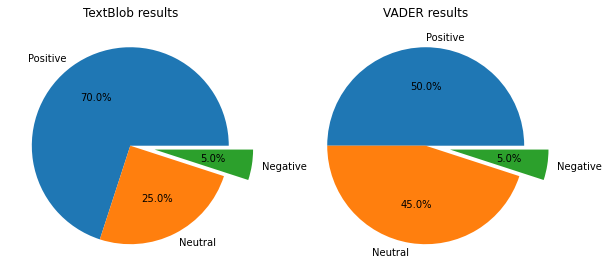

In [204]:
#Visual representation of TextBlob, VADER results
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
